In [1]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

In [4]:
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
features, # Feature matrix
target, # Target vector
cv=kf, # Cross-validation technique
scoring="accuracy", # Loss function
n_jobs=-1) # Use all CPU scores

# Calculate mean
cv_results.mean()

0.9693916821849783

In [5]:
# Import library
from sklearn.model_selection import train_test_split

# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [7]:
##  We first create a pipeline that preprocesses the data

# Create a pipeline
pipeline = make_pipeline(standardizer, logit)

# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
features, # Feature matrix
target, # Target vector
cv=kf, # Cross-validation technique
scoring="accuracy", # Loss function
n_jobs=-1) ## Use all CPU scores

In [9]:
## Creating a Baseline Regression Model

# Load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
# Load data
boston = load_boston()


In [10]:
# Create features
features, target = boston.data, boston.target

# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

In [11]:
# Load library
from sklearn.linear_model import LinearRegression

# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# Get R-squared score
ols.score(features_test, target_test)

0.6354638433202128

In [12]:
#Creating a Baseline Classification Model

# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
# Create target vector and feature matrix
features, target = iris.data, iris.target

In [13]:
# Create target vector and feature matrix
features, target = iris.data, iris.target

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

In [14]:
#By comparing the baseline classifier to our trained classifier, we can see the
#improvement:

# Load library
from sklearn.ensemble import RandomForestClassifier

# Create classifier
classifier = RandomForestClassifier()

# Train model
classifier.fit(features_train, target_train)

# Get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

In [15]:
##  Evaluating Binary Classifier Predictions

# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 2,
random_state = 1)

In [16]:
# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [17]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [18]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [19]:
# Cross-validate model using f1
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [20]:
### calculate accuracy for predicted y and y

# Load library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.1,
random_state=1)

# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

In [24]:
### Evaluating Binary Classifier Thresholds

# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
n_features=10,
n_classes=2,
n_informative=3,
random_state=3)


In [29]:
# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

# Create classifier
logit = LogisticRegression()

# Train model
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]
#target_probabilities.shape
#target_probabilities[:,1]


In [31]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
target_probabilities)

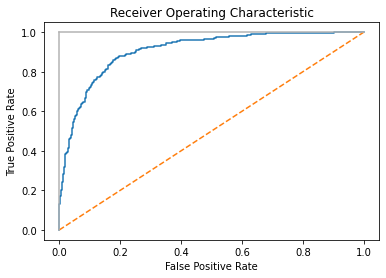

In [32]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [33]:
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [34]:
logit.classes_

array([0, 1])

In [35]:
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

In [36]:
### Evaluating Multiclass Classifier Predictions

# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 3,
random_state = 1)

In [37]:
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [38]:
## Visualizing a Classifier’s Performance

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [39]:
# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train,
target_train).predict(features_test)

C:\Users\ADAMS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


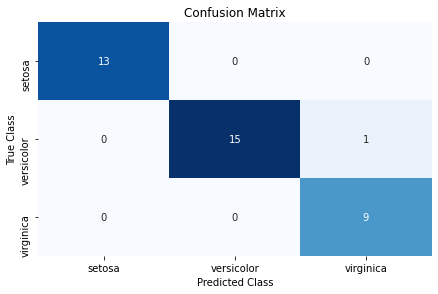

In [40]:
# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [41]:
### Evaluating Regression Models

# Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [42]:
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
n_features = 3,
n_informative = 3,
n_targets = 1,
noise = 50,
coef = False,
random_state = 1)

In [43]:
# Create a linear regression object
ols = LinearRegression()

# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [44]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [46]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [47]:
### Evaluating Clustering Models

# Generate feature matrix
features, _ = make_blobs(n_samples = 1000,
n_features = 10,
centers = 2,
cluster_std = 0.5,
shuffle = True,
random_state = 1)

In [48]:
# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# Get predicted classes
target_predicted = model.labels_

# Evaluate model
silhouette_score(features, target_predicted)

0.8916265564072142

In [49]:
### Creating a Custom Evaluation Metric

# Load libraries
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
# Generate features matrix and target vector
features, target = make_regression(n_samples = 100,
n_features = 3,
random_state = 1)

In [50]:
# Create training set and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.10, random_state=1)

# Create custom metric
def custom_metric(target_test, target_predicted):
# Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)

    # Return r-squared score
    return r2

# Make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)

# Create ridge regression object
classifier = Ridge()

# Train ridge regression model
model = classifier.fit(features_train, target_train)

# Apply custom scorer
score(model, features_test, target_test)

0.9997906102882058

In [51]:
# Predict values
target_predicted = model.predict(features_test)

# Calculate r-squared score
r2_score(target_test, target_predicted)

0.9997906102882058

In [52]:
## Visualizing the Effect of Training Set Size

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [53]:
# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(# Classifier
RandomForestClassifier(),
# Feature matrix
features,
# Target vector
target,
# Number of folds
cv=10,
# Performance metric
scoring='accuracy',
# Use all computer cores
n_jobs=-1,
# Sizes of 50
# training set
train_sizes=np.linspace(
0.01,
1.0,
50))

In [54]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

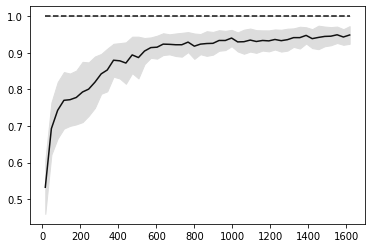

In [55]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
test_mean + test_std, color="#DDDDDD")

In [58]:
##  Creating a Text Report of Evaluation Metrics

# Load libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [60]:
# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

In [61]:
# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

C:\Users\ADAMS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
# Create a classification report
print(classification_report(target_test,
target_predicted,
target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [63]:
## Visualizing the Effect of Hyperparameter Values

# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [64]:
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

In [65]:
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
# Classifier
RandomForestClassifier(),
# Feature matrix
features,
# Target vector
target,
# Hyperparameter to examine
param_name="n_estimators",
# Range of hyperparameter's values
param_range=param_range,
# Number of folds
cv=3,
# Performance metric
scoring="accuracy",
# Use all computer cores
n_jobs=-1)

In [66]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [69]:
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

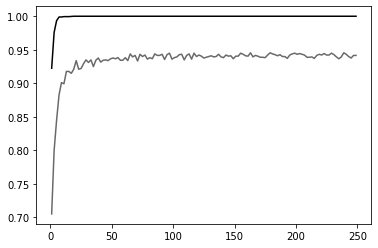

In [68]:
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

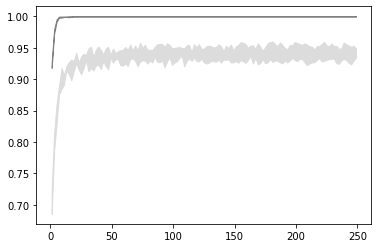

In [70]:
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
test_mean + test_std, color="gainsboro")